In [1]:
import os

try:
    has_changed_dir
except:
    has_changed_dir = False

try:
    import google.colab
    IN_COLAB = True
    print("Running as a Colab notebook")
except:
    IN_COLAB = False

if IN_COLAB:
    %pip install datasets
    %pip install translate-toolkit
    #%pip install bitsandbytes

    !git clone https://github.com/MarkusSibbesen/KDS-MI-temp.git

    if not has_changed_dir:
        os.chdir('KDS-MI-temp')
        has_changed_dir = True
else:
    if not has_changed_dir:
        os.chdir('.')
        has_changed_dir = True

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
model_url = 'AI-Sweden-Models/gpt-sw3-356m'
device = 'cuda'
model_url = 'EleutherAI/pythia-14m'
device = 'cpu'

In [23]:
from make_steering_vectors import main

In [25]:
main(
    model_url=model_url,
    target_language='sv',
    complement_languages=['da', 'en', 'is', 'nb'],
    device=device,
    out_folder='steering_vectors'
)

 32%|███▏      | 6/19 [00:15<00:33,  2.57s/it]


In [16]:
from utils.hooking import HookManager
from utils.compatibility import *
from utils.data import load_steering_vector, load_bible_data

from transformers import AutoModelForCausalLM, AutoTokenizer
from steering_loss import get_steering_vector_scores, plot_improvement_scores

In [6]:
model = AutoModelForCausalLM.from_pretrained(model_url).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_url)

In [27]:
ds = load_bible_data('sv', 'en')

hook_address = HookAddress.attention_pre.layer(4)
steering_vector = load_steering_vector('en', hook_address, model)

11it [01:47,  9.76s/it]


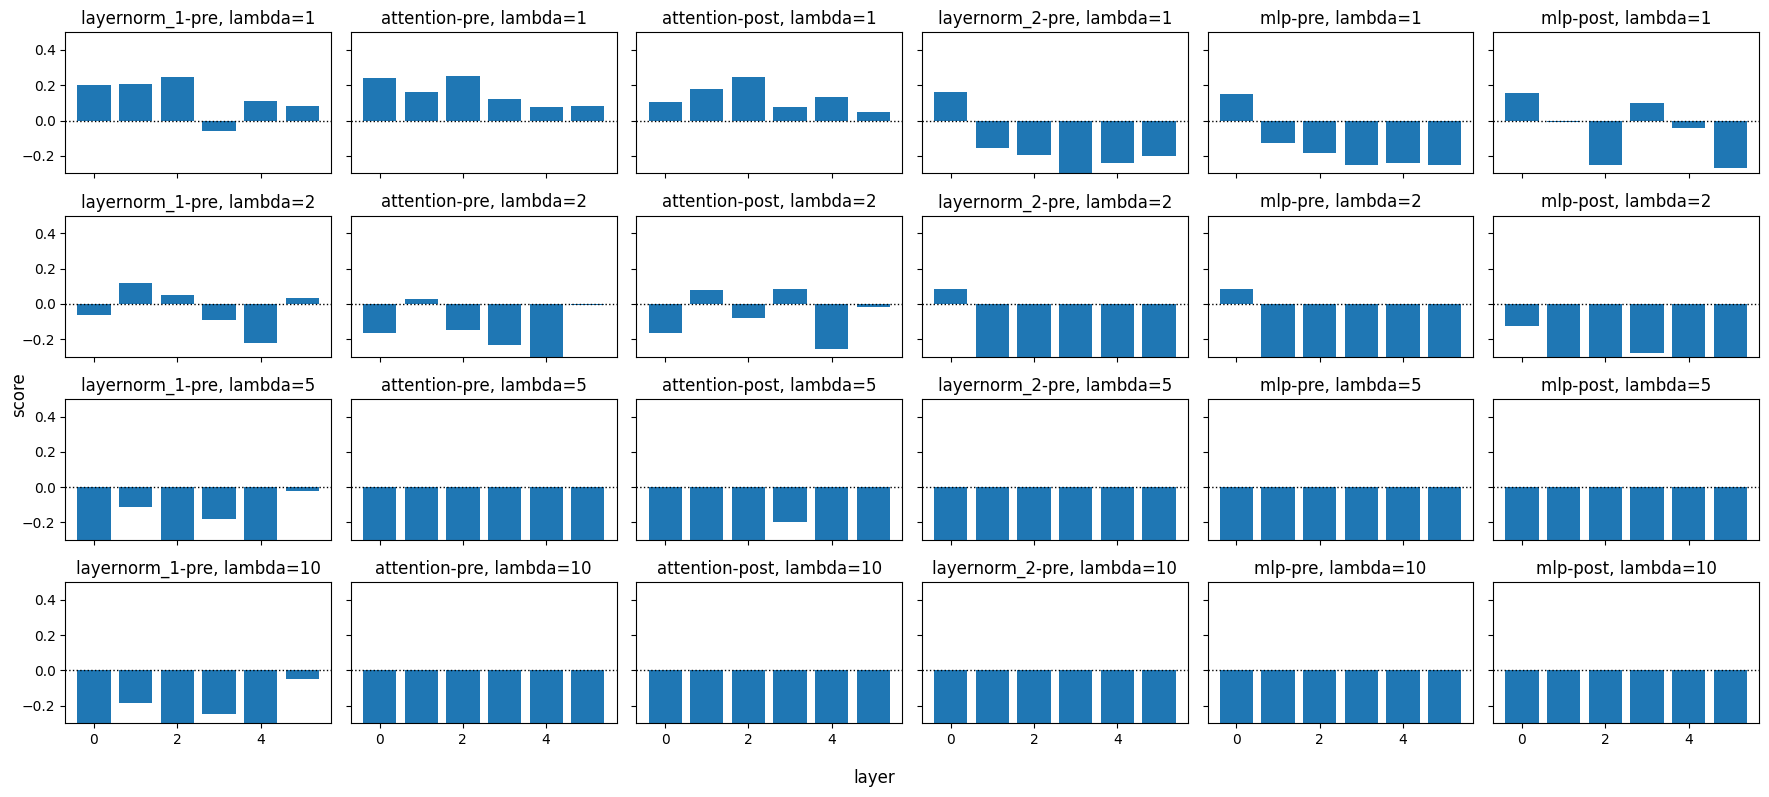

In [28]:
scores = get_steering_vector_scores(
    model=model,
    tokenizer=tokenizer,
    ds=ds,
    steering_lambdas=[1, 2, 5, 10],
    lan1='sv',
    lan2='en',
    amount_datapoints=10,
)